In [1]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [3]:
iris = datasets.load_iris()
data = iris.data[:, :2] #data
label = iris.target #label

We have 3 different labels

Text(0.5, 1.0, 'Iris dataset')

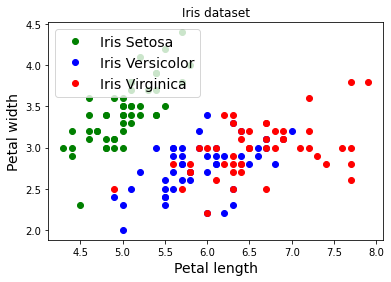

In [5]:
plt.plot(data[:, 0][label==0], data[:, 1][label==0], "go", label="Iris Setosa")
plt.plot(data[:, 0][label==1], data[:, 1][label==1], "bo", label="Iris Versicolor")
plt.plot(data[:, 0][label==2], data[:, 1][label==2], "ro", label="Iris Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("Iris dataset")

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.3, shuffle=True)


we use LiearSVC that uses a linear kernel. we also set multi_class to ovr to use one vs rest method.

In [7]:
clf = LinearSVC(multi_class='ovr',max_iter=10000)
clf.fit(x_train, y_train)

LinearSVC(max_iter=10000)

In [8]:
w = clf.coef_
b = clf.intercept_

In [11]:
y_test_predict=clf.predict(x_test)
accur=accuracy_score(y_test_predict, y_test)
print("test accuracy: " + str(accur))

test accuracy: 0.7777777777777778


Text(0.5, 1.0, 'confusion matrix')

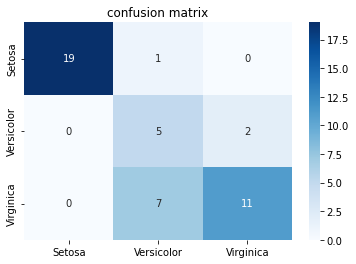

In [14]:
conf_mat_test = confusion_matrix(y_test_predict,  y_test)
sns.heatmap(conf_mat_test,xticklabels=["Setosa", "Versicolor", "Virginica"],
            yticklabels=["Setosa", "Versicolor", "Virginica"],cmap="Blues",annot=True)
plt.title("confusion matrix")

Text(0.5, 1.0, 'confidence matrix')

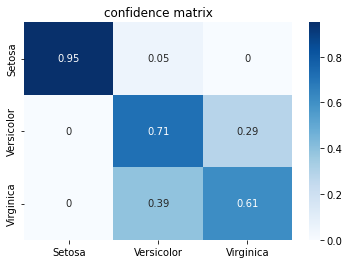

In [12]:
conf_mat_test = confusion_matrix(y_test_predict,  y_test,normalize="true")
sns.heatmap(conf_mat_test,xticklabels=["Setosa", "Versicolor", "Virginica"],
            yticklabels=["Setosa", "Versicolor", "Virginica"],cmap="Blues",annot=True)
plt.title("confidence matrix")


In confusion matrix C, Cij is number of observations known to be in group i and predicted to be in group j.
our model has predicted most of the Seosa flowers correctly, but it hasn't classified other groups as well. the most mislabeled flowers are Versicolor flowers that has been classified as Versicolor.

At the decision boundary, w0*x0 + w1*x1 + b = 0
=> x1 = -w0/w1 * x0 - b/w1


In [15]:
x1 = np.linspace(3.5, 8.5, 200)
x20= -(w[0,0]/w[0,1]) * x1 - (b[0]/w[0,1])
x21= -(w[1,0]/w[1,1]) * x1 - (b[1]/w[1,1])
x22= -(w[2,0]/w[2,1]) * x1 - (b[2]/w[2,1])

Text(0.5, 1.0, 'boundries')

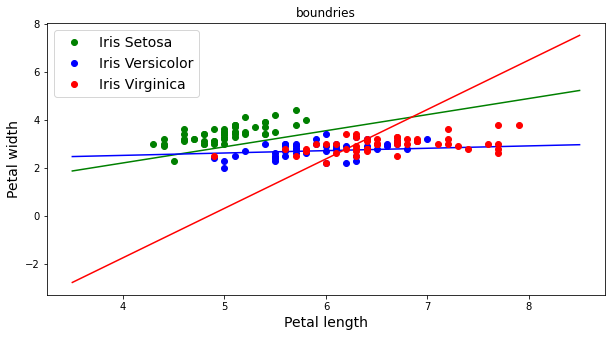

In [17]:
plt.figure(figsize=(10,5))
plt.plot(x1, x20, "g-" )
plt.plot(x1, x21, "b-" )
plt.plot(x1, x22, "r-" )
plt.plot(data[:, 0][label==0], data[:, 1][label==0], "go", label="Iris Setosa")
plt.plot(data[:, 0][label==1], data[:, 1][label==1], "bo", label="Iris Versicolor")
plt.plot(data[:, 0][label==2], data[:, 1][label==2], "ro", label="Iris Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("boundries")

we can see that most setosa flowers are above the green line so they are classified very well.
the blue line has classified 